In [1]:
import jax
import juniper as jp

from juniper.steps.NeuralField import NeuralField
from juniper.steps.StaticGain import StaticGain
from juniper.steps.DemoInput import DemoInput
from juniper.steps.Sum import Sum
from juniper.steps.ComponentMultiply import ComponentMultiply
from juniper.steps.GaussInput import GaussInput
from juniper.steps.Normalization import Normalization
from juniper.steps.TransferFunction import TransferFunction
from juniper.steps.TimedBoost import TimedBoost
from juniper.steps.Projection import Projection
from juniper.steps.HebbianConnection import HebbianConnection
from juniper.steps.CompressAxes import CompressAxes
from juniper.steps.ExpandAxes import ExpandAxes
from juniper.steps.ReorderAxes import ReorderAxes
from juniper.steps.HebbianConnection import HebbianConnection
from juniper.Gaussian import Gaussian
from juniper.Sigmoid import Sigmoid
from juniper.LateralKernel import LateralKernel

In [2]:
print("Computing devices found by JAX:")
print(jax.local_devices())

Computing devices found by JAX:
[CpuDevice(id=0)]


In [3]:
arch = jp.Architecture.get_arch()

In [23]:

from pprint import pprint
jp.Architecture.delete_arch()
arch = jp.Architecture.get_arch()

gauss0 = Gaussian(
    {
        "amplitude": 1.1,
        "sigma": [3,3],
        "factorized": True,
        "max_shape": [21,21],
        "normalized": False
    }
)

gauss1 = Gaussian(
    {
        "amplitude": 0.3,
        "sigma": [1,1],
        "factorized": False,
        "normalized": False,
        "max_shape": [21,21]
    }
)

gauss2 = Gaussian(
    {
        "amplitude": -0.5,
        "sigma": [6,6],
        "factorized": True,
        "max_shape": [50,50],
        "normalized": False
    }
)

lateral_kernel = LateralKernel({"kernels": [gauss0, gauss2]})

neural_field_params1 = {
        "shape": [50,50],
        "resting_level": -5,
        "global_inhibition": -0.01,
        "input_noise_gain": 0.1,
        "tau": 0.1,
        "sigmoid": "AbsSigmoid",
        "beta": 10,
        "theta": 0,
        "LateralKernel": lateral_kernel
    }
neural_field_params2 = {
        "shape": [50,50],
        "resting_level": -5,
        "global_inhibition": -0.01,
        "input_noise_gain": 0.1,
        "tau": 0.1,
        "sigmoid": "HeavySideSigmoid",
        "beta": 10,
        "theta": 0,
        "LateralKernel": gauss1
    }

gauss_params =     {
        "shape": [50,50],
        "amplitude": 5.5,
        "sigma": [2,2],
        "center": [25,25],
        "factorized": False,
        "normalized": False
    }

nf1 = NeuralField("nf1", params=neural_field_params1)
nf2 = NeuralField("nf2", params=neural_field_params2)
gauss0 = GaussInput("gauss0", params=gauss_params)

gauss0 >> nf1
gauss0 >> nf2

arch.compile()

Loading saved buffers...


  3.59 ms / time step
  0.11 s total duration

  0.04 ms average time for computation of static steps
  3.47 ms average time for dynamic computation
Saving buffers... done


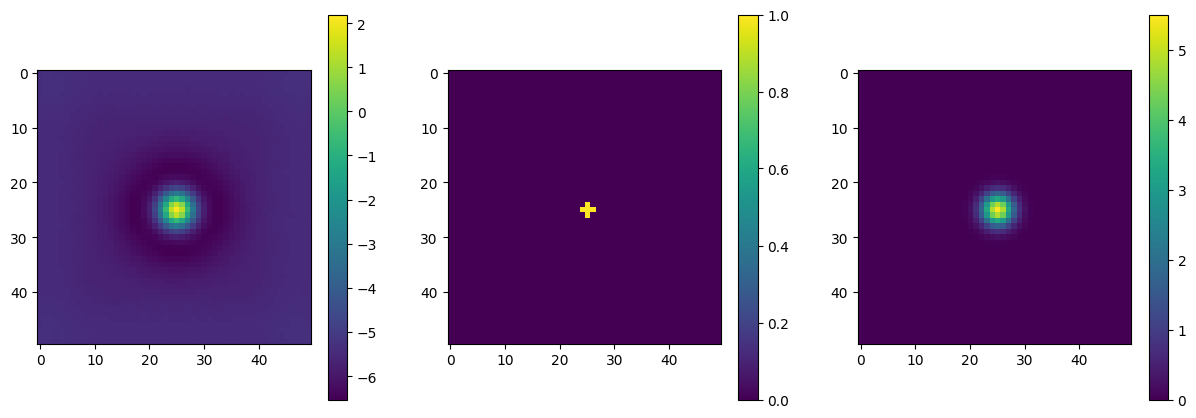

In [24]:
plot_data_history, ms_per_tick, timing = arch.run_simulation(arch.tick, ["nf1.activation", "nf2", "gauss0"], 30)


import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
im1=axes[0].imshow(plot_data_history[-1][0])
im2=axes[1].imshow(plot_data_history[-1][1])
im3=axes[2].imshow(plot_data_history[-1][2])
fig.colorbar(im1, ax=axes[0])
fig.colorbar(im2, ax=axes[1])
fig.colorbar(im3, ax=axes[2])
plt.show()

In [6]:
import time
from pprint import pprint
jp.Architecture.delete_arch()
arch = jp.Architecture.get_arch()

shape = [100,100,100]

gauss0 = Gaussian(
    {
        "amplitude": 0.3,
        "sigma": [3,3,3],
        "factorized": True,
        "max_shape": shape,
        "normalized": False,
        "shape": shape
    }
)

gauss1 = Gaussian(
    {
        "amplitude": 0.3,
        "sigma": [3,3,3],
        "factorized": False,
        "normalized": False,
        "max_shape": shape,
        "shape": shape
    }
)

neural_field_params1 = {
        "shape": shape,
        "resting_level": -5,
        "global_inhibition": -0.01,
        "input_noise_gain": 0.1,
        "tau": 0.1,
        "sigmoid": "AbsSigmoid",
        "beta": 100,
        "theta": 0,
        "LateralKernel": gauss0
    }
neural_field_params2 = {
        "shape": shape,
        "resting_level": -5,
        "global_inhibition": -0.01,
        "input_noise_gain": 0.1,
        "tau": 0.1,
        "sigmoid": "AbsSigmoid",
        "beta": 100,
        "theta": 0,
        "LateralKernel": gauss1
    }

gauss_params =     {
        "shape": shape,
        "amplitude": 5.0,
        "sigma": [3,3,3],
        "center": [25,25,25],
        "factorized": False,
        "normalized": False
    }

nf1 = NeuralField("nf1", params=neural_field_params1)
gauss0 = GaussInput("gauss0", params=gauss_params)

gauss0 >> nf1

arch.compile()
t0 = time.time()
plot_data_history, ms_per_tick, timing = arch.run_simulation(arch.tick, [], 100)
t1 = time.time()
print("time: ", t1-t0)

Loading saved buffers...
 97.15 ms / time step
  9.71 s total duration

  1.96 ms average time for computation of static steps
 95.06 ms average time for dynamic computation
Saving buffers... done
time:  9.717169523239136


In [7]:
import time
from pprint import pprint
jp.Architecture.delete_arch()
arch = jp.Architecture.get_arch()


nf1 = NeuralField("nf1", params=neural_field_params2)
gauss0 = GaussInput("gauss0", params=gauss_params)

gauss0 >> nf1

arch.compile()
t0 = time.time()
plot_data_history, ms_per_tick, timing = arch.run_simulation(arch.tick, [], 100)
t1 = time.time()
print("time: ", t1-t0)

Loading saved buffers...
326.87 ms / time step
 32.69 s total duration

  1.54 ms average time for computation of static steps
325.23 ms average time for dynamic computation
Saving buffers... done
time:  32.69138741493225


In [8]:
jp.Architecture.delete_arch()
arch = jp.Architecture.get_arch()

import time
from pprint import pprint
jp.Architecture.delete_arch()
arch = jp.Architecture.get_arch()

shape = [100,100]
neural_field_params1 = {
        "shape": shape,
        "resting_level": -3,
        "global_inhibition": -0.01,
        "input_noise_gain": 0.1,
        "tau": 0.1,
        "sigmoid": "AbsSigmoid",
        "beta": 100,
        "theta": 0
    }
neural_field_params2 = {
        "shape": [1,],
        "resting_level": -3,
        "global_inhibition": -0.01,
        "input_noise_gain": 0.1,
        "tau": 0.1,
        "sigmoid": "HeavySideSigmoid",
        "beta": 100,
        "theta": 0
    }
neural_field_params3 = {
        "shape": [10,],
        "resting_level": -3,
        "global_inhibition": -0.01,
        "input_noise_gain": 0.1,
        "tau": 0.1,
        "sigmoid": "HeavySideSigmoid",
        "beta": 100,
        "theta": 0
    }

neural_field_params4 = {
        "shape": [50,50],
        "resting_level": -3,
        "global_inhibition": -0.01,
        "input_noise_gain": 0.1,
        "tau": 0.1,
        "sigmoid": "AbsSigmoid",
        "beta": 100,
        "theta": 0
    }

gauss_params =     {
        "shape": [1,],
        "amplitude": 5.0,
        "sigma": [0.1,],
        "center": [0,],
        "factorized": False,
        "normalized": False
    }
gauss_params3 =     {
        "shape": [10,],
        "amplitude": 5.0,
        "sigma": [0.1,],
        "center": [0,],
        "factorized": False,
        "normalized": False
    }

gauss_params2 =     {
        "shape": shape,
        "amplitude": 5.0,
        "sigma": [3,3],
        "center": [30,30],
        "factorized": False,
        "normalized": False
    }
gauss_params4 =     {
        "shape": [50,50],
        "amplitude": 5.0,
        "sigma": [3,3],
        "center": [30,30],
        "factorized": False,
        "normalized": False
    }

hebbian_params = {"shape": [1,], "target_shape": shape, "tau": 0.01, "tau_decay": 0.1, "learning_rate": 0.00005,
                        "learning_rule": "instar", "bidirectional": True, "reward_type": "no_reward", "reward_duration": [0,1]}
hebbian_params2 = {"shape": [10,], "target_shape": [50,50], "tau": 0.01, "tau_decay": 0.1, "learning_rate": 0.02,
                        "learning_rule": "instar", "bidirectional": True, "reward_type": "no_reward", "reward_duration": [0,1]}

nf1 = NeuralField("nf1", params=neural_field_params1)
nf2 = NeuralField("nf2", params=neural_field_params4)
nd1 = NeuralField("nd1", params=neural_field_params2)
nd2 = NeuralField("nd2", params=neural_field_params3)
heb0 = HebbianConnection("heb0", params=hebbian_params)
heb1 = HebbianConnection("heb1", params=hebbian_params2)
gauss0 = GaussInput("gauss0", params=gauss_params)
gauss1 = GaussInput("gauss1", params=gauss_params2)
gauss3 = GaussInput("gauss3", params=gauss_params3)
gauss4 = GaussInput("gauss4", params=gauss_params4)

gauss0 >> nd1
gauss3 >> nd2
gauss1 >> nf1
gauss4 >> nf2

nd1 >> "heb0.in0" >> nf1 >> "heb0.in1"
gauss0 >> "heb0.in2"

nd2 >> "heb1.in0" >> nf2 >> "heb1.in1"
gauss0 >> "heb1.in2"

arch.compile()
t0 = time.time()
plot_data_history, ms_per_tick, timing = arch.run_simulation(arch.tick, [], 100)
t1 = time.time()
print("time: ", t1-t0)

Loading saved buffers...
  4.13 ms / time step
  0.41 s total duration

  0.06 ms average time for computation of static steps
  4.05 ms average time for dynamic computation
Saving buffers... done
time:  0.4445149898529053


  3.39 ms / time step
  0.10 s total duration

  0.10 ms average time for computation of static steps
  3.20 ms average time for dynamic computation
Saving buffers... done


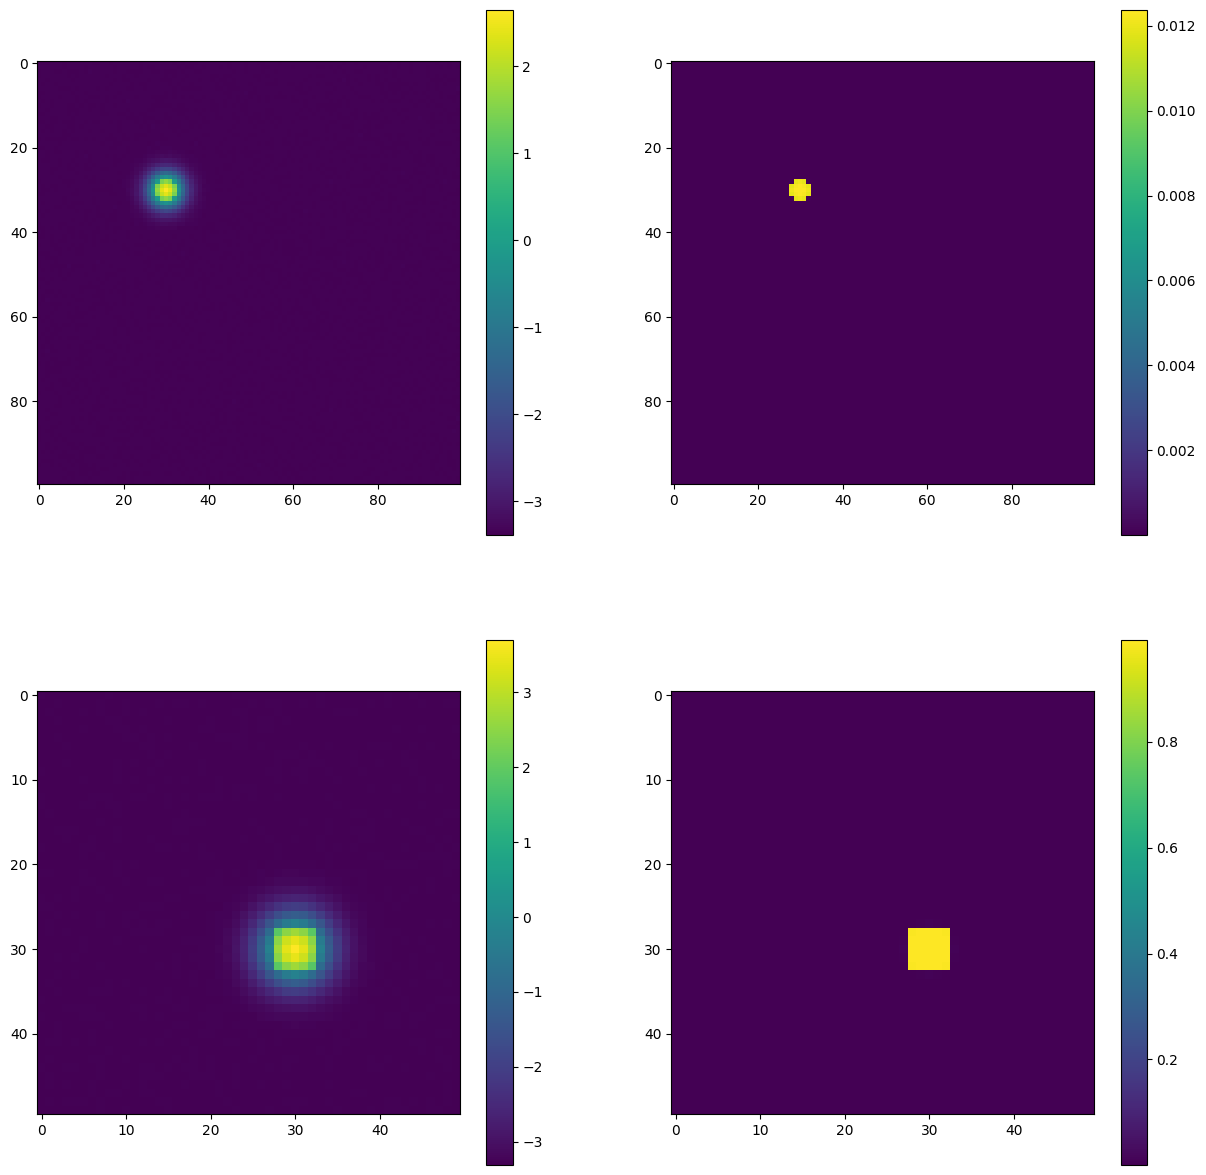

In [9]:
plot_data_history, ms_per_tick, timing = arch.run_simulation(arch.tick, ["nf1.activation", "heb0.wheights", "nf2.activation", "heb1.wheights"], 30)


import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
im1=axes[0,0].imshow(plot_data_history[-1][0])
im2=axes[0,1].imshow(plot_data_history[-1][1][0])
im3=axes[1,0].imshow(plot_data_history[-1][2])
im4=axes[1,1].imshow(plot_data_history[-1][3][0])
fig.colorbar(im1, ax=axes[0,0])
fig.colorbar(im2, ax=axes[0,1])
fig.colorbar(im3, ax=axes[1,0])
fig.colorbar(im4, ax=axes[1,1])
plt.show()